<a href="https://colab.research.google.com/github/drishtiiii/Brain-Tumor-Detection-VGG16-Model/blob/main/Brain_tumorDetection_using_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/archive_31.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [92]:

import tensorflow as tf
import keras,os
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt

In [93]:

path = "/content/archive_3"

train_generator = ImageDataGenerator(
    rescale=1./255, 
    horizontal_flip=2, 
    vertical_flip=2)
image_generator = ImageDataGenerator(
    rescale=1./255, 
    horizontal_flip=2, 
    vertical_flip=2, 
    validation_split=0.25)    
dir1='/content/archive_3/train'
training_set = train_generator.flow_from_directory(batch_size=16,
                                                 directory=dir1,
                                                 shuffle=True,
                                                 target_size=(224,224), 
                                                 subset="training",
                                                 class_mode='binary')

dir2='/content/archive_3/validation'
validation_set = image_generator.flow_from_directory(batch_size=16,
                                                 directory=dir2,
                                                 shuffle=True,
                                                 target_size=(224,224), 
                                                 subset="validation",
                                                 class_mode='binary')

Found 1792 images belonging to 2 classes.
Found 302 images belonging to 2 classes.


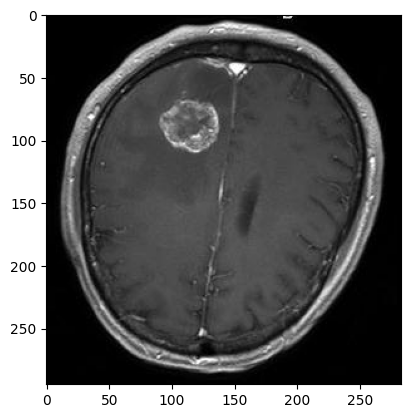

In [94]:

from cv2 import imread
yes_path = dir1+"/yes/"+os.listdir(dir1+"/yes/")[4]
tumour = imread(yes_path)
plt.imshow(tumour)

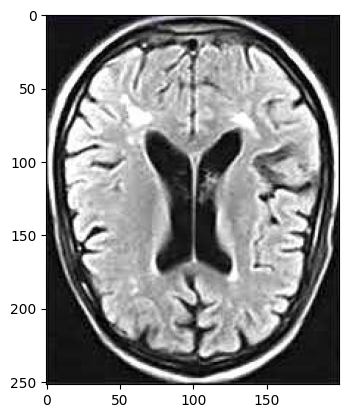

In [95]:

no_path = dir2+"/no/"+os.listdir(dir2+"/no/")[4]
tumour = imread(no_path)
plt.imshow(tumour)

In [96]:

training_set.class_indices
     

{'no': 0, 'yes': 1}

In [97]:
model = VGG16(
      input_shape = (224,224,3),
      include_top = False,
      
    )

     
for layers in model.layers:
    layers.trainable = False
    
x = Flatten()(model.output)
x = Dropout(0.4)(x)

x = Dense(256, activation='relu')(x)
x = Dense(1, activation = "sigmoid")(x)
model = keras.Model(model.input, x)


In [98]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [99]:
from tensorflow.keras.optimizers import Adam

In [100]:
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [101]:
hist = model.fit(training_set,validation_data = validation_set, epochs = 30,verbose=1,shuffle=True)
     

Epoch 1/30
112/112 [==============================] - 11s 89ms/step - loss: 0.4603 - accuracy: 0.8493 - val_loss: 0.1256 - val_accuracy: 0.9536
Epoch 2/30
112/112 [==============================] - 11s 94ms/step - loss: 0.1651 - accuracy: 0.9286 - val_loss: 0.1039 - val_accuracy: 0.9570
Epoch 3/30
112/112 [==============================] - 9s 83ms/step - loss: 0.0944 - accuracy: 0.9643 - val_loss: 0.0557 - val_accuracy: 0.9768
Epoch 4/30
112/112 [==============================] - 10s 88ms/step - loss: 0.1026 - accuracy: 0.9621 - val_loss: 0.0991 - val_accuracy: 0.9536
Epoch 5/30
112/112 [==============================] - 10s 89ms/step - loss: 0.0512 - accuracy: 0.9844 - val_loss: 0.0529 - val_accuracy: 0.9735
Epoch 6/30
112/112 [==============================] - 11s 96ms/step - loss: 0.0897 - accuracy: 0.9648 - val_loss: 0.4502 - val_accuracy: 0.8444
Epoch 7/30
112/112 [==============================] - 12s 103ms/step - loss: 0.0504 - accuracy: 0.9833 - val_loss: 0.0221 - val_accuracy:

In [102]:
hist = hist.history

In [103]:
model.evaluate(validation_set )

19/19 [==============================] - 1s 73ms/step - loss: 0.0077 - accuracy: 1.0000


[0.007733209058642387, 1.0]

Text(0, 0.5, 'accuracy')

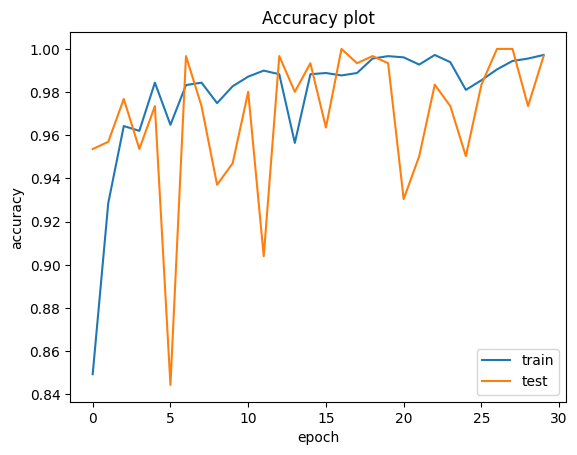

In [104]:
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.title("Accuracy plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")

Text(0, 0.5, 'loss')

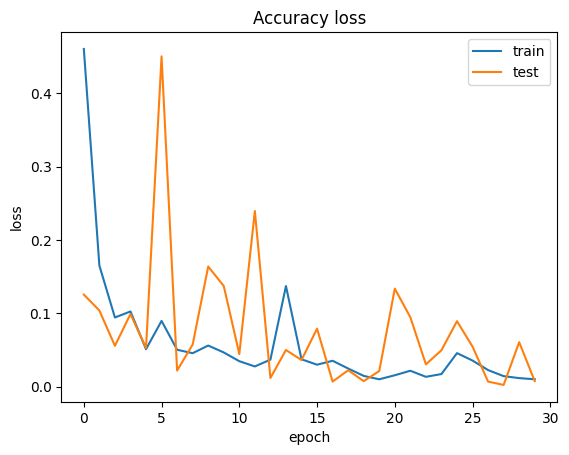

In [105]:
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")

In [106]:
import numpy as np

In [107]:

test_data = image_generator.flow_from_directory(
    dir2,
    target_size=(224, 224),
    batch_size= 16,
    shuffle=True,
    class_mode='binary',
    subset='validation')


# Get the true labels for the test data
true_labels = test_data.classes

# Get the predicted labels for the test data
predicted_labels = model.predict(test_data)


Found 302 images belonging to 2 classes.
19/19 [==============================] - 1s 70ms/step


In [108]:
test_data

In [109]:
predicted_labels = model.predict(test_data)

19/19 [==============================] - 1s 70ms/step


In [110]:
predicted_label_index = np.argmax(predicted_labels, axis=None)

In [111]:
predicted_labels_rounded = ((np.rint(predicted_labels.ravel())).astype(int))

In [112]:
 #Evaluate the model on the test set
loss, accuracy = model.evaluate(test_data)

# Print the results
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

19/19 [==============================] - 1s 72ms/step - loss: 0.0073 - accuracy: 0.9967
Test Loss: 0.0073139239102602005
Test Accuracy: 0.996688723564148


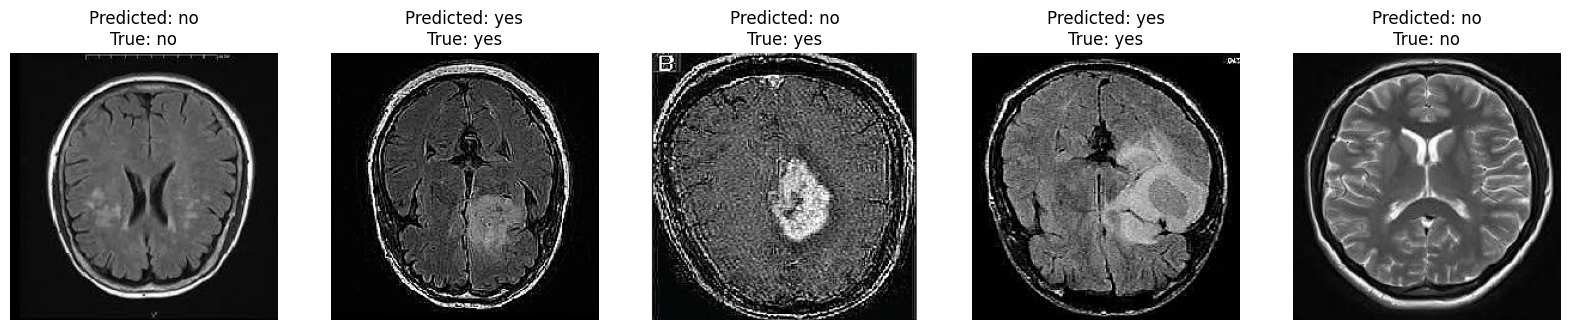

In [113]:
import numpy as np

# Get a few images from the test set
# Get a few images and labels from the test set
num_images = 5
test_data_batch = next(test_data)
test_images = test_data_batch[0]
test_labels = test_data_batch[1]

# Convert one-hot encoded labels to class names
class_names = list(test_data.class_indices.keys())
true_labels = np.squeeze(test_labels).astype(int)
true_class_names = [class_names[label] for label in true_labels]
predicted_class_names = [class_names[label] for label in predicted_labels_rounded]

# Plot the images with their predicted and true labels
fig, axes = plt.subplots(1, num_images, figsize=(20, 5))

for i, ax in enumerate(axes):
    ax.imshow(test_images[i])
    ax.axis('off')
    ax.set_title(f"Predicted: {predicted_class_names[i]}\nTrue: {true_class_names[i]}")

plt.show()

In [114]:

# Generate the classification report
from sklearn.metrics import classification_report

# Ensure the arrays have the same number of samples
num_samples = min(len(true_labels), len(predicted_labels_rounded))
true_labels = true_labels[:num_samples]
predicted_labels_rounded = predicted_labels_rounded[:num_samples]

print(classification_report(true_labels, predicted_labels_rounded))

              precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.75      0.67      0.71         9

    accuracy                           0.69        16
   macro avg       0.69      0.69      0.69        16
weighted avg       0.70      0.69      0.69        16



In [115]:
# Generate the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels,predicted_labels_rounded)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[5 2]
 [3 6]]


In [117]:
model.save("./vgg16.h5")
